# Introduction to Scikit-learn

In this lab session we will start working with the scikit-learn library for doing supervised learning.
We are using a simple toy datasets that's included with scikit-learn and consists of low resolution images of handwritten digits.
The task is to classify each image into which digit it represents, from zero to nine.

## Data loading and splitting
Before we start with the machine learning, it's a good idea to have a look at the data first.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()

The digits object is similar to a dictionary and contains the data and some information about the dataset. The most important attributes are ``digits.data`` and ``digits.target``, both of which are numy arrays:

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Task
Find out the number of images stored in ``digits.data`` (keeping in mind that the rows correspond to samples and columns correspond to features) and confirm that there are ten separate classes in ``digits.target``.

In [67]:
print("Type of digits.data = ",type(digits.data))
print("Samples of digits.data = ",digits.data.shape[0])
print("Features of digits.data = ",digits.data.shape[1])
print("Type of digits.target = ",type(digits.target))
print("Rows of digits.target = ",digits.target.shape[0])
print("digits.data = \n",digits.data)
print("digits.target = \n",digits.target)
for i in range(0,10):
    if i in digits.target:
        print(i," is in digits.target")
    else:
        print(i," is NOT in digits.target")

Type of digits.data =  <class 'numpy.ndarray'>
Samples of digits.data =  1797
Features of digits.data =  64
Type of digits.target =  <class 'numpy.ndarray'>
Rows of digits.target =  1797
digits.data = 
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
digits.target = 
 [0 1 2 ..., 8 9 8]
0  is in digits.target
1  is in digits.target
2  is in digits.target
3  is in digits.target
4  is in digits.target
5  is in digits.target
6  is in digits.target
7  is in digits.target
8  is in digits.target
9  is in digits.target


You can see that there are 64 features in the dataset. These represent the grays-scale values in an 8x8 pixel image. We can vizualize these using matplotlib's ``matshow``:

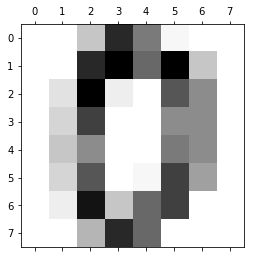

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Reshapes the first sample (row) into 8x8 matrix
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)

### Task
Plot the first 10 images in the dataset and set the title of the plot to the corresponding class.

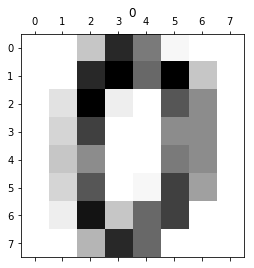

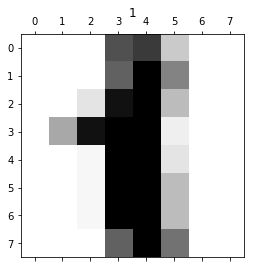

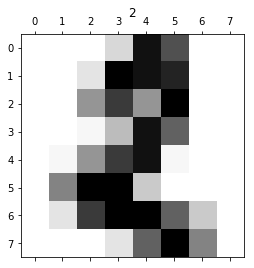

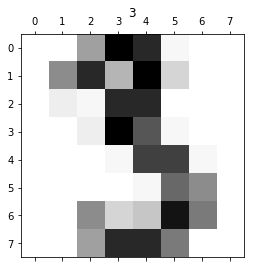

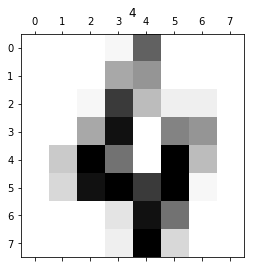

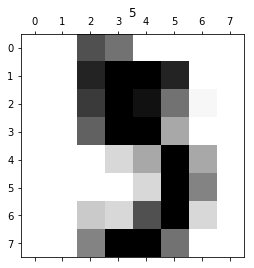

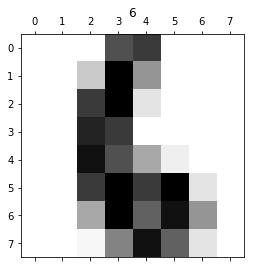

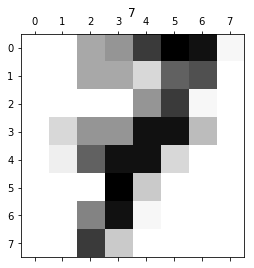

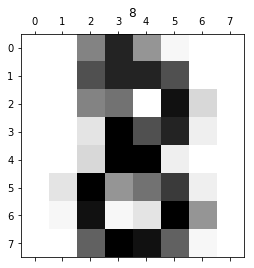

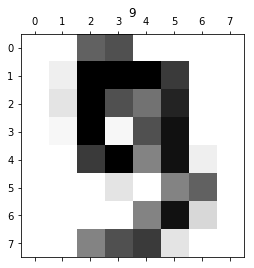

In [73]:
for i in range(0,10):
    plt.matshow(digits.data[i].reshape(8, 8), cmap=plt.cm.Greys)
    plt.title(i)

Next, we need to split the data into a training set for building the model and a test set for evaluating the model. We can use the ``train_test_split`` function from the ``model_selection`` module for that:

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)

X_train.shape =  (1347, 64)
X_test.shape =  (450, 64)


## Building our first classifier
We will use the ``LogisticRegression`` model (which, despite its name, is a classifier). We will discuss the model more in-depth later today.

The first step to using a model is importing it:

In [75]:
from sklearn.linear_model import LogisticRegression

Then, we instantiate the model. The lr object we create contains the logic for creating the model, making predictions, and will also store the model parameters we learned from the data.

In [76]:
lr = LogisticRegression()

Now, we can fit the model on the training data:

In [77]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Apply the model and evaluate it on the training data:

In [79]:
print(lr.predict(X_train))
print(y_train)

[2 8 9 ..., 7 7 8]
[2 8 9 ..., 7 7 8]


For classification, score computes the accuracy, which is the fraction of correctly classified examples.

In [81]:
lr.score(X_train, y_train)

0.99628804751299183

### Task
Compute the accuracy of the model on the test set. Then, use the ``predict`` method to get the test set predictions, and compute the accuracy yourself using numpy. It should yield the same result.

Next, find 10 examples from the test set that have been misclassified, plot the image and the true and predicted classes. Do the mistakes made by the classifier make sense?

In [82]:
lr.score(X_test,y_test)

0.95333333333333337

In [112]:
predicted = lr.predict(X_test)
j = 0
# Number of correct classifications divided by total number of classifications is the score
for i in range(0,len(predicted)):
    if (predicted[i] == y_test[i]):
        j = j + 1

print(j/len(predicted))

0.9533333333333334


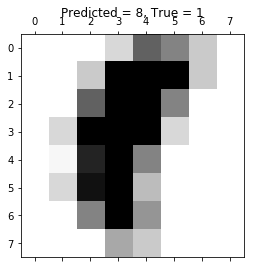

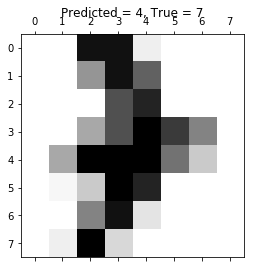

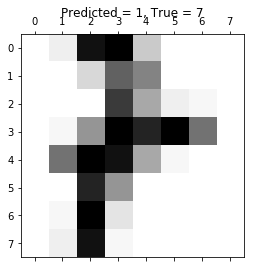

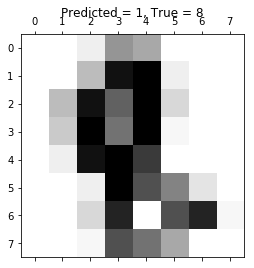

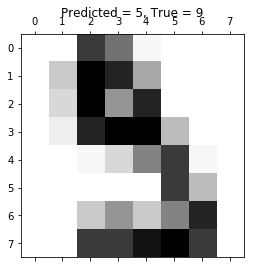

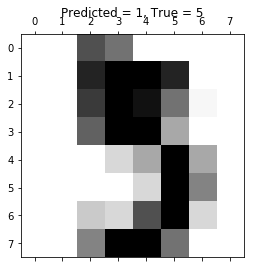

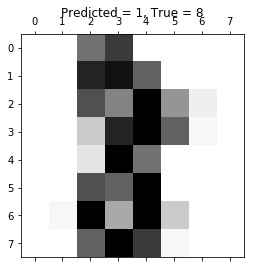

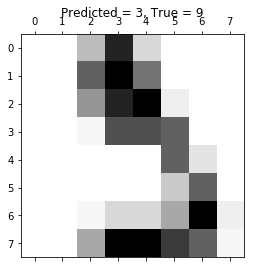

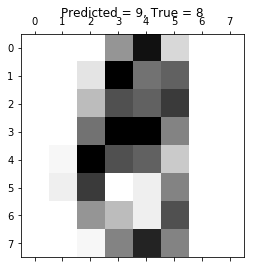

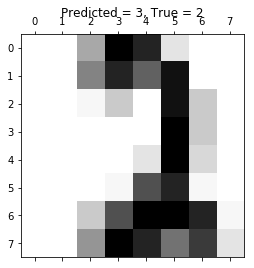

In [129]:
def showMisclassified(model, n):
    i = 0
    j = 0
    predicted = model.predict(X_test)
    while i < n:
        if (predicted[j] != y_test[j]):
            plt.matshow(X_test[j].reshape(8, 8), cmap=plt.cm.Greys)
            plt.title("Predicted = "+format(predicted[j],"d")+", True = "+format(y_test[j],"d"))
            i = i + 1
        j = j + 1
        if (j >= len(predicted)):
            break

showMisclassified(lr,10)

## Another classifier

### Task
Try out a different classifier, the ``KNeighborsClassifier`` from the ``sklearn.neighbors`` module. As before, train the model on the training set, then evaluate it on the test set.

Training score:  0.991091314031
Test score:  0.98


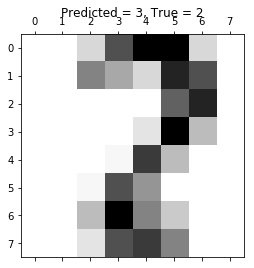

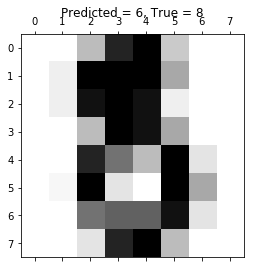

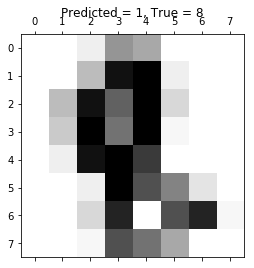

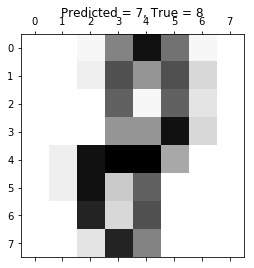

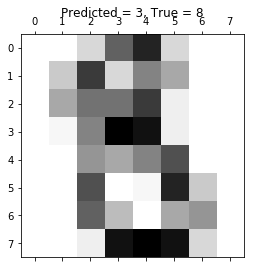

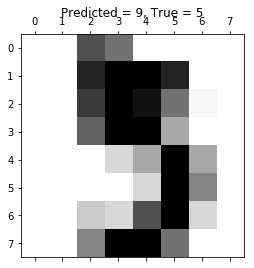

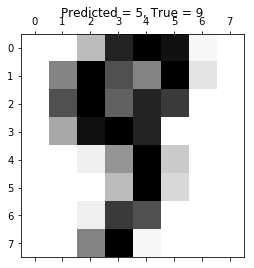

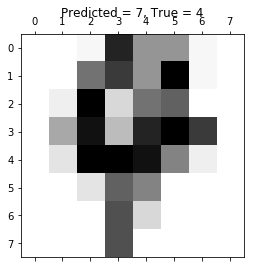

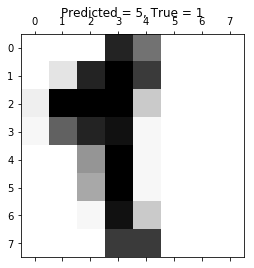

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print("Training score: ",knc.score(X_train, y_train))
print("Test score: ",knc.score(X_test, y_test))
showMisclassified(knc,10)

# Regression
Next we will look at a regression problem. The dataset we are using is the  "Boston housing dataset" that predicts house prices in different Boston neighborhoods in the 1970s.
Let's start by loading the data:

In [131]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


The ``boston.DESCR`` attribute provides a description of the dataset:

In [132]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Task
Confirm the number of samples and features in the ``boston.data`` attribute. Then look at the target attribute ``boston.target`` and plot it's distribution using ``plt.hist``.

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
(506, 13)
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7

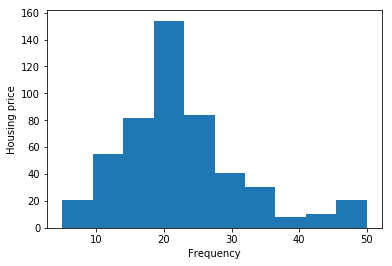

In [196]:
print(boston.data)
print(boston.data.shape)
print(boston.target)
plt.hist(boston.target)
plt.ylabel("Housing price")
plt.xlabel("Frequency")
print(boston.feature_names)

### Task

Proceed as we did for classification, and split the data into a training and a test set. Then fit a ``LinearRegression`` model from the ``sklearn.linear_model`` module on the training set, and evaluate it on the test set. The metric provided by the ``score`` method for regression is the $R^2$ score, with 1 being a perfect score and 0 being the score of a constant prediction.

Create a scatter plot of the predictions against the ground truth on the test set. This plot can often be a helpful analysis tool in regression.

In [141]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)

X_train.shape =  (379, 13)
X_test.shape =  (127, 13)


In [144]:
lin.fit(X_train, y_train)
print("Training score: ",lin.score(X_train, y_train))
print("Test score: ",lin.score(X_test, y_test))

Training score:  0.769744837056
Test score:  0.635362078667


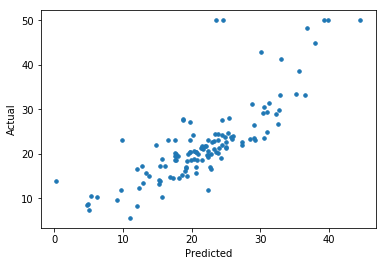

In [195]:
y_predict = lin.predict(X_test)
plt.plot(y_predict,y_test,marker=".",linewidth=0,ms=7)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()